In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.rcParams['font.family'] = 'AppleGothic'

# 파일 경로 설정
file_path = "/Users/damien/Desktop/금융연구회/24-2/DSAI 스터디/lending_club_2020_train.csv"

# CSV 파일을 pandas 데이터프레임으로 읽기
data = pd.read_csv(file_path)

data

/var/folders/r2/nm86hl8s7fv3n393n0wj8s700000gn/T/ipykernel_28834/2700309099.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,124989905,6000.0,6000.0,6000.0,36 months,7.97%,187.94,A,A5,Teacher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,139665484,35000.0,35000.0,35000.0,60 months,14.47%,822.95,C,C2,Product Specialist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,84253847,23200.0,23200.0,23200.0,60 months,24.99%,680.82,E,E4,Production Foreman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
3,126296074,4500.0,4500.0,4500.0,36 months,9.93%,145.06,B,B2,Office Manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,148913312,15000.0,15000.0,15000.0,36 months,16.40%,530.33,C,C4,Secretary,...,May-2020,Jul-2020,May-2020,2.0,0.0,ACTIVE,413.83,11025.25,54.62,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755290,12987407,3600.0,3600.0,3600.0,36 months,19.99%,133.78,E,E1,Manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1755291,44299336,19000.0,19000.0,18875.0,36 months,6.68%,583.89,A,A3,Systems Engineer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1755292,5205034,9600.0,9600.0,9600.0,36 months,14.33%,329.65,C,C1,ESS Support services,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1755293,128261912,24000.0,24000.0,24000.0,36 months,7.35%,744.90,A,A4,sales associate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [2]:
# 영어 컬럼명을 한글로 변환하기 위한 매핑 사전
column_mapping = {
    'acc_now_delinq': '현재 연체 계좌 수',
    'acc_open_past_24mths': '최근 24개월간 개설된 계좌 수',
    'addr_state': '주소 상태',
    'all_util': '모든 거래의 잔액 대비 한도 비율',
    'annual_inc': '연간 소득',
    'annual_inc_joint': '연간 공동 소득',
    'application_type': '신청 유형',
    'avg_cur_bal': '평균 현재 잔액',
    'bc_open_to_buy': '은행카드 사용 가능 금액',
    'bc_util': '은행카드 한도 대비 사용 비율',
    'chargeoff_within_12_mths': '지난 12개월간 차감 횟수',
    'collection_recovery_fee': '차감 후 회수 수수료',
    'collections_12_mths_ex_med': '지난 12개월간 (의료 제외) 추심 횟수',
    'delinq_2yrs': '지난 2년간 30일 이상 연체된 계좌 수',
    'delinq_amnt': '현재 연체된 계좌의 연체 금액',
    'desc': '대출 설명',
    'dti': '부채 대비 소득 비율',
    'dti_joint': '공동 신청인의 부채 대비 소득 비율',
    'earliest_cr_line': '최초 신용 계좌 개설일',
    'emp_length': '근무 기간 (년)',
    'emp_title': '직업명',
    'fico_range_high': 'FICO 상한선',
    'fico_range_low': 'FICO 하한선',
    'funded_amnt': '대출 금액',
    'funded_amnt_inv': '투자자별 대출 금액',
    'grade': '등급',
    'home_ownership': '주택 소유 상태',
    'id': '고유 ID',
    'il_util': '할부 계좌 한도 대비 사용 비율',
    'initial_list_status': '초기 상장 상태',
    'inq_fi': '금융 조회 수',
    'inq_last_12m': '지난 12개월간 조회 수',
    'inq_last_6mths': '지난 6개월간 조회 수',
    'installment': '월 상환액',
    'int_rate': '이자율',
    'issue_d': '발행일',
    'last_credit_pull_d': '최근 신용 조회일',
    'last_fico_range_high': '최근 FICO 상한선',
    'last_fico_range_low': '최근 FICO 하한선',
    'last_pymnt_amnt': '최근 지급된 금액',
    'last_pymnt_d': '최근 지급일',
    'loan_amnt': '대출 신청 금액',
    'loan_status': '대출 상태',
    'max_bal_bc': '최대 은행카드 잔액',
    'member_id': '회원 ID',
    'mo_sin_old_il_acct': '가장 오래된 할부 계좌 개설 후 월 수',
    'mo_sin_old_rev_tl_op': '가장 오래된 회전 계좌 개설 후 월 수',
    'mo_sin_rcnt_rev_tl_op': '최근 회전 계좌 개설 후 월 수',
    'mo_sin_rcnt_tl': '최근 계좌 개설 후 월 수',
    'mort_acc': '모기지 계좌 수',
    'mths_since_last_delinq': '최근 연체 후 경과 개월 수',
    'mths_since_last_major_derog': '최근 90일 이상 연체 후 경과 개월 수',
    'mths_since_last_record': '최근 기록 후 경과 개월 수',
    'mths_since_rcnt_il': '최근 할부 계좌 개설 후 개월 수',
    'mths_since_recent_bc': '최근 은행카드 계좌 개설 후 개월 수',
    'mths_since_recent_bc_dlq': '최근 은행카드 연체 후 개월 수',
    'mths_since_recent_inq': '최근 조회 후 개월 수',
    'mths_since_recent_revol_delinq': '최근 회전 계좌 연체 후 개월 수',
    'next_pymnt_d': '다음 예정 상환일',
    'num_accts_ever_120_pd': '120일 이상 연체된 계좌 수',
    'num_actv_bc_tl': '활성 은행카드 계좌 수',
    'num_actv_rev_tl': '활성 회전 계좌 수',
    'num_bc_sats': '만족스러운 은행카드 계좌 수',
    'num_bc_tl': '은행카드 계좌 수',
    'num_il_tl': '할부 계좌 수',
    'num_op_rev_tl': '활성 회전 계좌 수',
    'num_rev_accts': '회전 계좌 수',
    'num_rev_tl_bal_gt_0': '잔액이 0보다 큰 회전 계좌 수',
    'num_sats': '만족스러운 계좌 수',
    'num_tl_120dpd_2m': '최근 2개월간 120일 이상 연체된 계좌 수',
    'num_tl_30dpd': '현재 30일 이상 연체된 계좌 수',
    'num_tl_90g_dpd_24m': '최근 24개월간 90일 이상 연체된 계좌 수',
    'num_tl_op_past_12m': '지난 12개월간 개설된 계좌 수',
    'open_acc': '현재 활성 신용 계좌 수',
    'open_acc_6m': '지난 6개월간 활성 신용 계좌 수',
    'open_il_12m': '지난 12개월간 할부 계좌 개설 수',
    'open_il_24m': '지난 24개월간 할부 계좌 개설 수',
    'open_act_il': '활성 할부 계좌 수',
    'open_rv_12m': '지난 12개월간 회전 계좌 개설 수',
    'open_rv_24m': '지난 24개월간 회전 계좌 개설 수',
    'out_prncp': '잔여 원금',
    'out_prncp_inv': '투자자별 잔여 원금',
    'pct_tl_nvr_dlq': '연체 경험이 없는 거래 비율',
    'percent_bc_gt_75': '한도 75% 초과 은행카드 계좌 비율',
    'policy_code': '정책 코드',
    'pub_rec': '공공 기록 수',
    'pub_rec_bankruptcies': '공공 기록 파산 수',
    'purpose': '대출 목적',
    'pymnt_plan': '상환 계획 여부',
    'recoveries': '차감 후 회수 금액',
    'revol_bal': '회전 신용 잔액',
    'revol_util': '회전 계좌 사용 비율',
    'sub_grade': '하위 등급',
    'tax_liens': '세금 유치권 수',
    'term': '대출 기간',
    'title': '대출 제목',
    'tot_coll_amt': '총 추심 금액',
    'tot_cur_bal': '총 현재 잔액',
    'tot_hi_cred_lim': '총 고신용 한도',
    'total_acc': '총 계좌 수',
    'total_bal_ex_mort': '모기지 제외 총 잔액',
    'total_bal_il': '할부 계좌 총 잔액',
    'total_bc_limit': '총 은행카드 한도',
    'total_cu_tl': '금융 거래 계좌 수',
    'total_il_high_credit_limit': '총 할부 계좌 고신용 한도',
    'total_pymnt': '총 지급 금액',
    'total_pymnt_inv': '투자자별 총 지급 금액',
    'total_rec_int': '지급된 이자 총액',
    'total_rec_late_fee': '지급된 연체 수수료 총액',
    'total_rec_prncp': '지급된 원금 총액',
    'total_rev_hi_lim': '회전 신용 고한도 총액',
    'verification_status': '소득 검증 상태',
    'verified_status_joint': '공동 소득 검증 상태',
    'zip_code': '우편번호',
    'revol_bal_joint': '공동 대출자의 회전 신용 잔액',
    'sec_app_fico_range_low': '부차 신청자 FICO 하한선',
    'sec_app_fico_range_high': '부차 신청자 FICO 상한선',
    'sec_app_earliest_cr_line': '부차 신청자 최초 신용 계좌 개설일',
    'sec_app_inq_last_6mths': '부차 신청자 최근 6개월간 조회 수',
    'sec_app_mort_acc': '부차 신청자 모기지 계좌 수',
    'sec_app_open_acc': '부차 신청자 활성 계좌 수',
    'sec_app_revol_util': '부차 신청자 회전 신용 한도 대비 사용 비율',
    'sec_app_open_act_il': '부차 신청자 활성 할부 계좌 수',
    'sec_app_num_rev_accts': '부차 신청자 회전 계좌 수',
    'sec_app_chargeoff_within_12_mths': '부차 신청자 지난 12개월간 차감 횟수',
    'sec_app_collections_12_mths_ex_med': '부차 신청자 지난 12개월간 (의료 제외) 추심 횟수',
    'sec_app_mths_since_last_major_derog': '부차 신청자 최근 90일 이상 연체 후 경과 개월 수',
    'hardship_flag': '고난 계획 여부',
    'hardship_type': '고난 계획 유형',
    'hardship_reason': '고난 계획 이유',
    'hardship_status': '고난 계획 상태',
    'deferral_term': '고난 기간',
    'hardship_amount': '고난 기간 동안의 이자 지급 금액',
    'hardship_start_date': '고난 계획 시작일',
    'hardship_end_date': '고난 계획 종료일',
    'payment_plan_start_date': '상환 계획 시작일',
    'hardship_length': '고난 계획 기간',
    'hardship_dpd': '고난 계획 시작일 기준 연체 일수',
    'hardship_loan_status': '고난 계획 시작일 기준 대출 상태',
    'orig_projected_additional_accrued_interest': '고난 계획 시작일 기준 예상 추가 이자',
    'hardship_payoff_balance_amount': '고난 계획 시작일 기준 상환 잔액',
    'hardship_last_payment_amount': '고난 계획 시작일 기준 최근 지급 금액',
    'disbursement_method': '대출 지급 방식',
    'debt_settlement_flag': '채무 조정 여부',
    'debt_settlement_flag_date': '채무 조정 플래그 설정 날짜',
    'settlement_status': '채무 조정 상태',
    'settlement_date': '채무 조정일',
    'settlement_amount': '채무 조정 금액',
    'settlement_percentage': '채무 조정 비율',
    'settlement_term': '채무 조정 기간'
}

# 컬럼 이름을 한글로 변경
data.rename(columns=column_mapping, inplace=True)

data


,고유 ID,대출 신청 금액,대출 금액,투자자별 대출 금액,대출 기간,이자율,월 상환액,등급,하위 등급,직업명,...,고난 계획 시작일,고난 계획 종료일,상환 계획 시작일,고난 계획 기간,고난 계획 시작일 기준 연체 일수,고난 계획 시작일 기준 대출 상태,고난 계획 시작일 기준 예상 추가 이자,고난 계획 시작일 기준 상환 잔액,고난 계획 시작일 기준 최근 지급 금액,채무 조정 여부
0,124989905,6000.0,6000.0,6000.0,36 months,7.97%,187.94,A,A5,Teacher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,139665484,35000.0,35000.0,35000.0,60 months,14.47%,822.95,C,C2,Product Specialist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,84253847,23200.0,23200.0,23200.0,60 months,24.99%,680.82,E,E4,Production Foreman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
3,126296074,4500.0,4500.0,4500.0,36 months,9.93%,145.06,B,B2,Office Manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,148913312,15000.0,15000.0,15000.0,36 months,16.40%,530.33,C,C4,Secretary,...,May-2020,Jul-2020,May-2020,2.0,0.0,ACTIVE,413.83,11025.25,54.62,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755290,12987407,3600.0,3600.0,3600.0,36 months,19.99%,133.78,E,E1,Manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1755291,44299336,19000.0,19000.0,18875.0,36 months,6.68%,583.89,A,A3,Systems Engineer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1755292,5205034,9600.0,9600.0,9600.0,36 months,14.33%,329.65,C,C1,ESS Support services,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1755293,128261912,24000.0,24000.0,24000.0,36 months,7.35%,744.90,A,A4,sales associate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [3]:
# 출력 가능한 최대 열 및 행 수를 확장
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 데이터프레임의 각 칼럼의 데이터 타입 확인
print(data.dtypes)


고유 ID                             object
대출 신청 금액                         float64
대출 금액                            float64
투자자별 대출 금액                       float64
대출 기간                             object
이자율                               object
월 상환액                            float64
등급                                object
하위 등급                             object
직업명                               object
근무 기간 (년)                         object
주택 소유 상태                          object
연간 소득                            float64
소득 검증 상태                          object
발행일                               object
대출 상태                             object
상환 계획 여부                          object
url                               object
대출 목적                             object
대출 제목                             object
우편번호                              object
주소 상태                             object
부채 대비 소득 비율                      float64
지난 2년간 30일 이상 연체된 계좌 수           float64
최초 신용 계좌 개설일    

In [4]:
# 고유 ID가 저장된 열이 'id'라고 가정하고 고유값 개수 확인
unique_id_count = data['고유 ID'].nunique()

# 고유 아이디 개수 출력
print(f"고유 아이디 개수: {unique_id_count}")


고유 아이디 개수: 1755295


In [5]:
# 데이터프레임의 칼럼명 리스트 출력
column_names = data.columns.tolist()

# 칼럼명 리스트 출력
print(column_names)


['고유 ID', '대출 신청 금액', '대출 금액', '투자자별 대출 금액', '대출 기간', '이자율', '월 상환액', '등급', '하위 등급', '직업명', '근무 기간 (년)', '주택 소유 상태', '연간 소득', '소득 검증 상태', '발행일', '대출 상태', '상환 계획 여부', 'url', '대출 목적', '대출 제목', '우편번호', '주소 상태', '부채 대비 소득 비율', '지난 2년간 30일 이상 연체된 계좌 수', '최초 신용 계좌 개설일', 'FICO 하한선', 'FICO 상한선', '지난 6개월간 조회 수', '최근 연체 후 경과 개월 수', '최근 기록 후 경과 개월 수', '현재 활성 신용 계좌 수', '공공 기록 수', '회전 신용 잔액', '회전 계좌 사용 비율', '총 계좌 수', '초기 상장 상태', '잔여 원금', '투자자별 잔여 원금', '총 지급 금액', '투자자별 총 지급 금액', '지급된 원금 총액', '지급된 이자 총액', '지급된 연체 수수료 총액', '차감 후 회수 금액', '차감 후 회수 수수료', '최근 지급일', '최근 지급된 금액', '다음 예정 상환일', '최근 신용 조회일', '최근 FICO 상한선', '최근 FICO 하한선', '지난 12개월간 (의료 제외) 추심 횟수', '최근 90일 이상 연체 후 경과 개월 수', '정책 코드', '신청 유형', '연간 공동 소득', '공동 신청인의 부채 대비 소득 비율', 'verification_status_joint', '현재 연체 계좌 수', '총 추심 금액', '총 현재 잔액', '지난 6개월간 활성 신용 계좌 수', '활성 할부 계좌 수', '지난 12개월간 할부 계좌 개설 수', '지난 24개월간 할부 계좌 개설 수', '최근 할부 계좌 개설 후 개월 수', '할부 계좌 총 잔액', '할부 계좌 한도 대비 사용 비율', '지난 12개월간 회전 계좌 개설 수', '지난 24개월간 회전 계좌 개설 수', '최대 은행카드 잔액', '모든 거래의 잔액

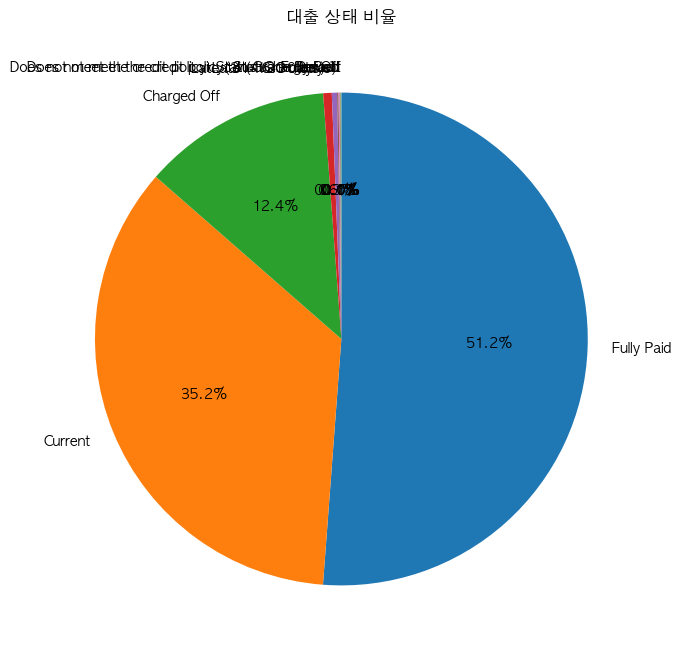

In [6]:
import matplotlib.pyplot as plt

# '대출 상태' 컬럼의 값에 대한 빈도 계산
loan_status_counts = data['대출 상태'].value_counts()

# 원그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('대출 상태 비율')
plt.show()


In [7]:
# '대출 상태' 칼럼의 값에 대한 빈도 계산 및 출력
loan_status_counts = data['대출 상태'].value_counts()

# 결과 출력
print(loan_status_counts)


대출 상태
Fully Paid                                             898522
Current                                                618688
Charged Off                                            217366
Late (31-120 days)                                       9840
In Grace Period                                          6049
Late (16-30 days)                                        1620
Issued                                                   1258
Does not meet the credit policy. Status:Fully Paid       1223
Does not meet the credit policy. Status:Charged Off       460
Default                                                   268
Name: count, dtype: int64


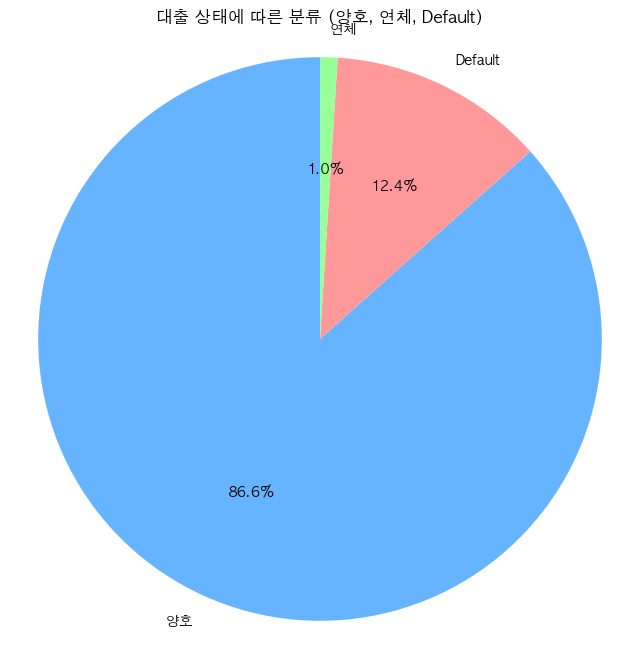

In [8]:
import matplotlib.pyplot as plt

# '대출 상태'를 '양호', '연체', 'Default'로 묶기 위한 매핑
status_mapping = {
    'Fully Paid': '양호',
    'Current': '양호',
    'Issued': '양호',
    'Does not meet the credit policy. Status: Fully Paid': '양호',
    'Late (31-120 days)': '연체',
    'Late (16-30 days)': '연체',
    'In Grace Period': '연체',
    'Charged Off': 'Default',
    'Does not meet the credit policy. Status: Charged Off': 'Default',
    'Default': 'Default'
}

# '대출 상태'에 따라 '양호', '연체', 'Default'로 재분류
data['대출 상태 그룹'] = data['대출 상태'].map(status_mapping)

# 각 그룹의 빈도수 계산
status_counts = data['대출 상태 그룹'].value_counts()

# 원형 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title('대출 상태에 따른 분류 (양호, 연체, Default)')
plt.axis('equal')  # 원이 일그러지지 않도록
plt.show()


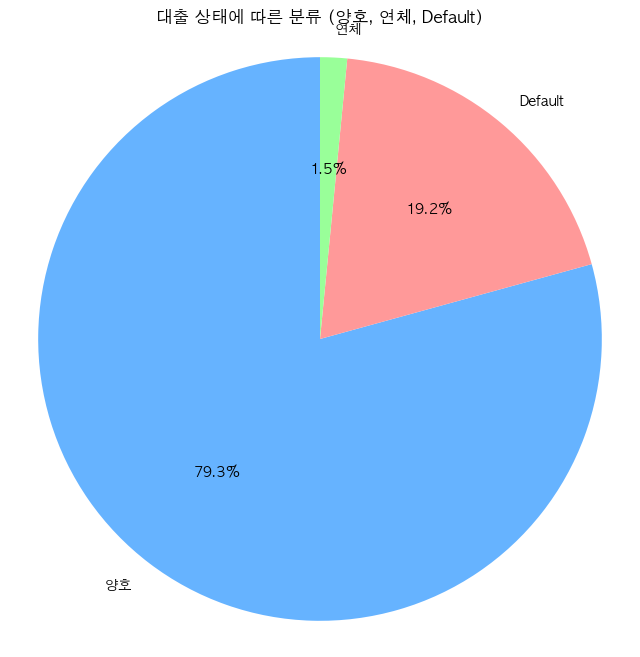

In [9]:
import matplotlib.pyplot as plt

# '대출 상태'를 '양호', '연체', 'Default'로 묶기 위한 매핑 (Current 제외)
status_mapping = {
    'Fully Paid': '양호',
    'Issued': '양호',
    'Does not meet the credit policy. Status: Fully Paid': '양호',
    'Late (31-120 days)': '연체',
    'Late (16-30 days)': '연체',
    'In Grace Period': '연체',
    'Charged Off': 'Default',
    'Does not meet the credit policy. Status: Charged Off': 'Default',
    'Default': 'Default'
}

# '대출 상태'에 따라 '양호', '연체', 'Default'로 재분류하고 'Current' 제거
data['대출 상태 그룹'] = data['대출 상태'].map(status_mapping)

# 'Current'를 제외한 데이터 필터링
filtered_data = data.dropna(subset=['대출 상태 그룹'])

# 각 그룹의 빈도수 계산
status_counts = filtered_data['대출 상태 그룹'].value_counts()

# 원형 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title('대출 상태에 따른 분류 (양호, 연체, Default)')
plt.axis('equal')  # 원이 일그러지지 않도록
plt.show()


<Figure size 1000x600 with 0 Axes>

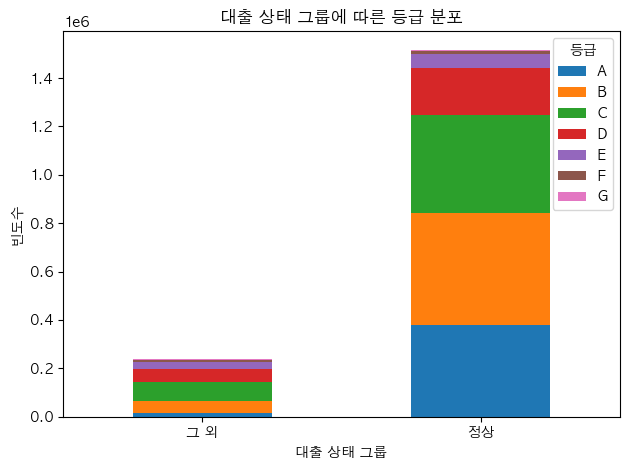

In [10]:
# '대출 상태'를 '정상'과 '그 외'로 그룹화
data['대출 상태 그룹'] = data['대출 상태'].apply(lambda x: '정상' if x in ['Fully Paid', 'Current'] else '그 외')

# '대출 상태 그룹'과 '등급'에 대한 빈도수 계산
grouped_data = data.groupby(['대출 상태 그룹', '등급']).size().unstack()

# 시각화
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)

plt.title('대출 상태 그룹에 따른 등급 분포')
plt.xlabel('대출 상태 그룹')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.legend(title='등급')
plt.tight_layout()

# 그래프 출력
plt.show()

In [11]:
# '이자율' 칼럼의 데이터 타입 확인
print(data['이자율'].dtype)


object


In [12]:
# '이자율' 칼럼에서 상위 10개 값 출력
print(data['이자율'].head(10))


0      7.97%
1     14.47%
2     24.99%
3      9.93%
4     16.40%
5      7.07%
6     10.42%
7      9.99%
8     17.97%
9      8.19%
Name: 이자율, dtype: object


In [13]:
# '%' 기호를 제거하고, 숫자형(float)으로 변환한 후 100으로 나누어 소수로 변환
data['이자율'] = data['이자율'].str.replace('%', '').astype(float) / 100

# 변환 후 상위 10개 값 출력
print(data['이자율'].head(10))


0    0.0797
1    0.1447
2    0.2499
3    0.0993
4    0.1640
5    0.0707
6    0.1042
7    0.0999
8    0.1797
9    0.0819
Name: 이자율, dtype: float64


In [14]:
# '이자율' 컬럼의 통계적 수치를 출력
interest_rate_stats = data['이자율'].describe()

# 결과 출력
print(interest_rate_stats)


count    1.755294e+06
mean     1.304374e-01
std      4.859769e-02
min      5.310000e-02
25%      9.170000e-02
50%      1.249000e-01
75%      1.599000e-01
max      3.099000e-01
Name: 이자율, dtype: float64


1684
이자율과 부도 상태 간의 상관관계:
                이자율  대출 상태 그룹
이자율       1.000000  0.207474
대출 상태 그룹  0.207474  1.000000


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.draw()
/Users/damien/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


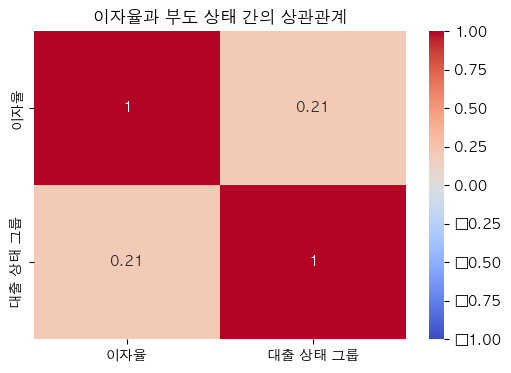

In [15]:
# 대출 상태를 '양호', '연체', 'Default'로 매핑
status_mapping = {
    'Fully Paid': '양호',
    'Current': '양호',
    'Issued': '양호',
    'Does not meet the credit policy. Status: Fully Paid': '양호',
    'Late (31-120 days)': '연체',
    'Late (16-30 days)': '연체',
    'In Grace Period': '연체',
    'Charged Off': 'Default',
    'Does not meet the credit policy. Status: Charged Off': 'Default',
    'Default': 'Default'
}

# '대출 상태'를 기준으로 '대출 상태 그룹'에 값을 매핑
data['대출 상태 그룹'] = data['대출 상태'].map(status_mapping)

# 매핑 후 결측값 확인
print(data['대출 상태 그룹'].isnull().sum())  # 결측값이 없도록 해야 함

# 부도 상태를 숫자로 매핑 ('양호' = 0, '연체' = 1, 'Default' = 2)
status_numeric_mapping = {'양호': 0, '연체': 1, 'Default': 2}
data['대출 상태 그룹'] = data['대출 상태 그룹'].map(status_numeric_mapping)

# 결측값 제거
filtered_data = data[['이자율', '대출 상태 그룹']].dropna()

# 상관관계 계산
correlation = filtered_data.corr()

# 상관관계 출력
print("이자율과 부도 상태 간의 상관관계:\n", correlation)

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('이자율과 부도 상태 간의 상관관계')
plt.show()





매핑 후 결측값 개수: 1684
이자율과 부도 상태 간의 상관관계 (Current 제외):
                이자율  대출 상태 그룹
이자율       1.000000  0.254016
대출 상태 그룹  0.254016  1.000000


/var/folders/r2/nm86hl8s7fv3n393n0wj8s700000gn/T/ipykernel_28834/3739016787.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['대출 상태 그룹'] = filtered_data['대출 상태 그룹'].map(status_numeric_mapping)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.draw()
/Users/damien/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


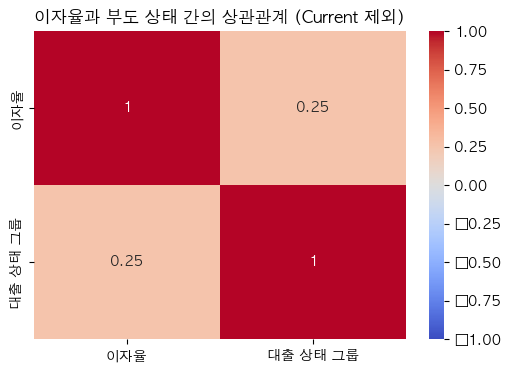

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# '대출 상태'를 '양호', '연체', 'Default'로 매핑 (Current 제외)
status_mapping = {
    'Fully Paid': '양호',
    'Issued': '양호',
    'Does not meet the credit policy. Status: Fully Paid': '양호',
    'Late (31-120 days)': '연체',
    'Late (16-30 days)': '연체',
    'In Grace Period': '연체',
    'Charged Off': 'Default',
    'Does not meet the credit policy. Status: Charged Off': 'Default',
    'Default': 'Default'
}

# '대출 상태'를 기준으로 '대출 상태 그룹'에 값을 매핑
data['대출 상태 그룹'] = data['대출 상태'].map(status_mapping)

# 'Current' 상태를 제거한 데이터 필터링 (이것이 핵심입니다)
filtered_data = data[data['대출 상태'] != 'Current']

# 매핑 후 결측값 확인 (Current 제외)
print(f"매핑 후 결측값 개수: {filtered_data['대출 상태 그룹'].isnull().sum()}")  # 결측값 없음

# 부도 상태를 숫자로 매핑 ('양호' = 0, '연체' = 1, 'Default' = 2)
status_numeric_mapping = {'양호': 0, '연체': 1, 'Default': 2}
filtered_data['대출 상태 그룹'] = filtered_data['대출 상태 그룹'].map(status_numeric_mapping)

# 결측값 제거 후 상관관계 계산
final_filtered_data = filtered_data[['이자율', '대출 상태 그룹']].dropna()

# 상관관계 계산
correlation = final_filtered_data.corr()

# 상관관계 출력
print("이자율과 부도 상태 간의 상관관계 (Current 제외):\n", correlation)

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('이자율과 부도 상태 간의 상관관계 (Current 제외)')
plt.show()


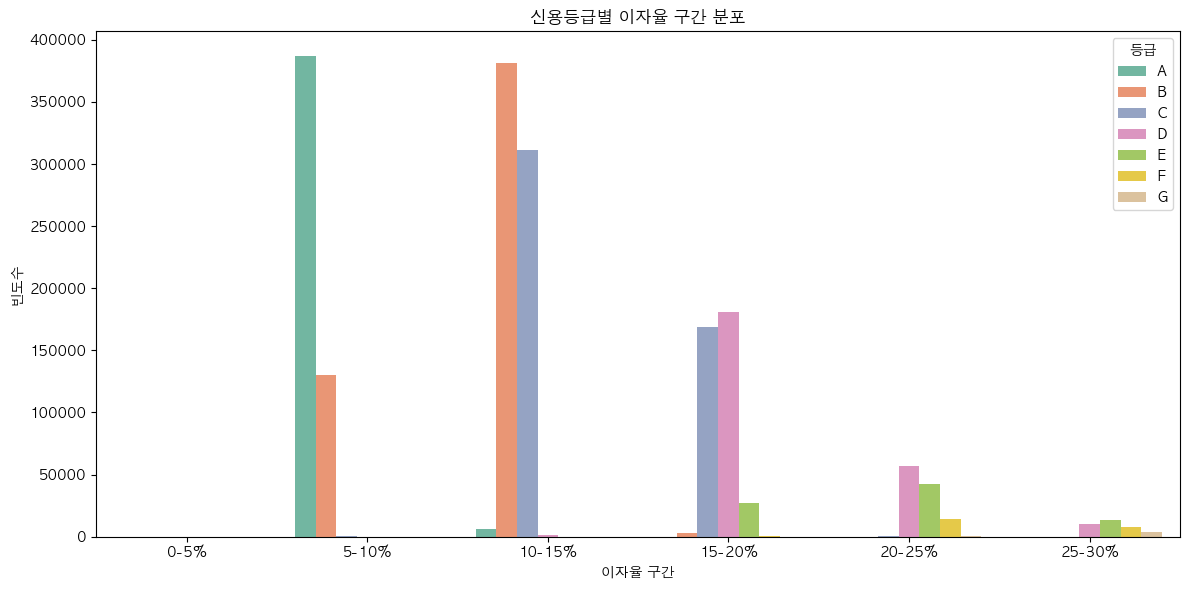

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이자율 구간 나누기 (예: 5% 구간씩 나누기)
bins = [0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
labels = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%']
data['이자율 구간'] = pd.cut(data['이자율'], bins=bins, labels=labels, right=False)

# 신용등급 순서를 지정 (A, B, C, D, E, F, G 순서)
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# 신용등급별 이자율 구간 분포 시각화
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='이자율 구간', hue='등급', hue_order=grade_order, palette='Set2')

# 그래프 설정
plt.title('신용등급별 이자율 구간 분포')
plt.xlabel('이자율 구간')
plt.ylabel('빈도수')
plt.legend(title='등급')
plt.tight_layout()

# 그래프 출력
plt.show()


# 대출 시점에만 얻을 수 있는 코드 토대로 이자율이랑 히트맵 만들어보자

In [18]:
# '근무 기간 (년)' 칼럼의 데이터와 데이터 타입 출력
print(data['근무 기간 (년)'].head(10))  # 상위 10개 값 출력
print(f"\n'근무 기간 (년)' 데이터 타입: {data['근무 기간 (년)'].dtype}")


0      2 years
1      2 years
2    10+ years
3    10+ years
4    10+ years
5          NaN
6      5 years
7    10+ years
8      5 years
9       1 year
Name: 근무 기간 (년), dtype: object

'근무 기간 (년)' 데이터 타입: object


<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
/var/folders/r2/nm86hl8s7fv3n393n0wj8s700000gn/T/ipykernel_28834/311133078.py:25: SyntaxWarning: invalid escape sequence '\d'
  }).str.extract('(\d+\.?\d*)').astype(float)


0     2.0
1     2.0
2    10.0
3    10.0
4    10.0
5     NaN
6     5.0
7    10.0
8     5.0
9     1.0
Name: 근무 기간 (년), dtype: float64

'근무 기간 (년)' 데이터 타입: float64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.draw()
/Users/damien/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


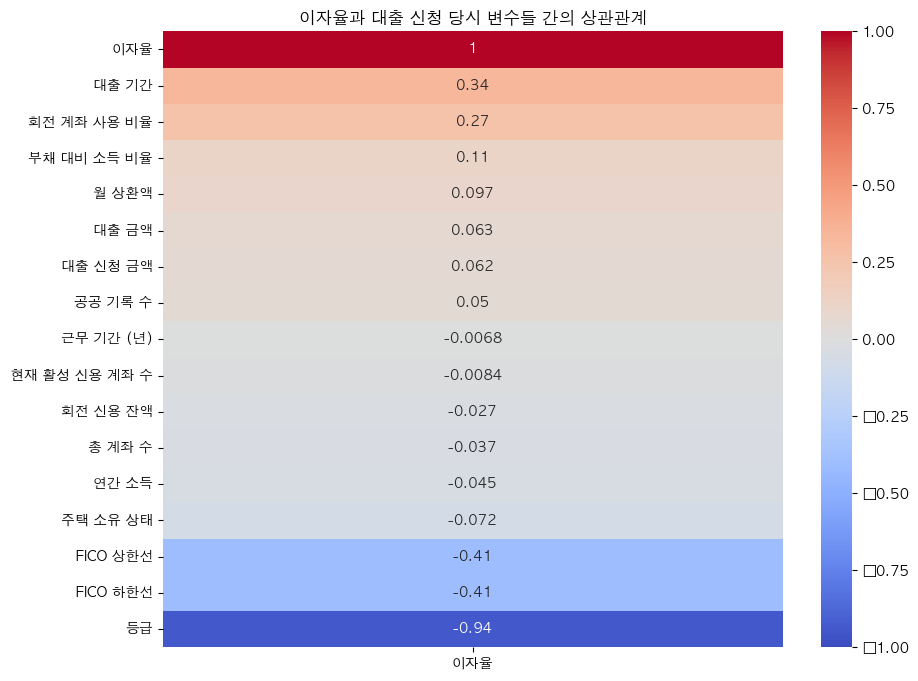

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 필요한 칼럼들만 추리는 함수
def prepare_correlation_data(data):
    # 대출 신청 당시의 정보만 포함할 칼럼 목록
    columns_for_correlation = [
        '대출 신청 금액', '대출 금액', '대출 기간', '월 상환액', '등급', '근무 기간 (년)',
        '주택 소유 상태', '연간 소득', '부채 대비 소득 비율', 'FICO 하한선', 'FICO 상한선',
        '현재 활성 신용 계좌 수', '공공 기록 수', '회전 신용 잔액', '회전 계좌 사용 비율', '총 계좌 수', '이자율'
    ]
    
    # 이자율을 포함한 데이터프레임 생성
    correlation_data = data[columns_for_correlation].copy()
    
    return correlation_data

# 1. 칼럼 목록 추리기
correlation_data = prepare_correlation_data(data)

# 2. '근무 기간 (년)' 문자열을 숫자형으로 변환
correlation_data['근무 기간 (년)'] = data['근무 기간 (년)'].replace({
    '10+ years': '10', '< 1 year': '0.5'
}).str.extract('(\d+\.?\d*)').astype(float)

# 변환된 상위 10개 값과 데이터 타입 출력
print(correlation_data['근무 기간 (년)'].head(10))
print(f"\n'근무 기간 (년)' 데이터 타입: {correlation_data['근무 기간 (년)'].dtype}")

# 3. '회전 계좌 사용 비율'에서 '%' 기호를 제거하고 숫자로 변환
correlation_data['회전 계좌 사용 비율'] = data['회전 계좌 사용 비율'].str.replace('%', '').astype(float) / 100

# 4. '대출 기간', '등급', '주택 소유 상태' 등의 범주형 변수를 숫자로 변환
correlation_data['대출 기간'] = data['대출 기간'].map({' 36 months': 36, ' 60 months': 60})
correlation_data['등급'] = data['등급'].map({'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1})
correlation_data['주택 소유 상태'] = data['주택 소유 상태'].map({'RENT': 0, 'OWN': 1, 'MORTGAGE': 2})

# 5. 상관관계 계산
corr_matrix = correlation_data.corr(numeric_only=True)

# 6. 이자율과 다른 변수들과의 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['이자율']].sort_values(by='이자율', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('이자율과 대출 신청 당시 변수들 간의 상관관계')
plt.show()


**FICO 상한선**과 **FICO 하한선**은 **FICO 신용 점수**의 상한값과 하한값을 의미합니다. 대출을 신청할 때, 각 개인은 **FICO 신용 점수**라는 금융 신뢰도를 나타내는 점수를 가지고 있습니다. 이 점수는 대출자가 채무를 상환할 능력이나 의향을 나타내는 중요한 지표입니다.

### **FICO 점수란?**
FICO 점수는 300점에서 850점 사이에서 매겨지며, 이 점수는 대출자의 신용도와 상환 가능성을 평가하는 중요한 기준이 됩니다. FICO 점수가 높을수록 대출자가 더 신용할 만한 사람으로 간주되며, 낮을수록 신용 리스크가 큰 것으로 평가됩니다.

### **FICO 상한선(FICO Range High)**
- **FICO 상한선**은 해당 대출 신청 시 대출자의 신용 점수 범위에서 **최고 점수**를 나타냅니다.
- 예를 들어, 대출자가 680에서 720 사이의 FICO 점수 범위를 가지고 있다면, 상한선은 720입니다.

### **FICO 하한선(FICO Range Low)**
- **FICO 하한선**은 대출 신청 시 대출자의 신용 점수 범위에서 **최저 점수**를 나타냅니다.
- 위 예에서 하한선은 680입니다.

따라서 대출 데이터에서 **FICO 상한선**과 **하한선**은 대출자의 FICO 신용 점수 범위를 나타내며, 이 점수는 대출자마다 달라질 수 있습니다. 대출 결정에 중요한 역할을 하며, 이자율 등 여러 대출 조건에 영향을 미칩니다.

신용등급과 대출 상태 그룹 간의 상관관계:
               신용등급  대출 상태 그룹
신용등급      1.000000  0.249818
대출 상태 그룹  0.249818  1.000000


/var/folders/r2/nm86hl8s7fv3n393n0wj8s700000gn/T/ipykernel_28834/1854611233.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['대출 상태 그룹'] = filtered_data['대출 상태 그룹'].map(status_numeric_mapping)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.draw()
/Users/damien/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


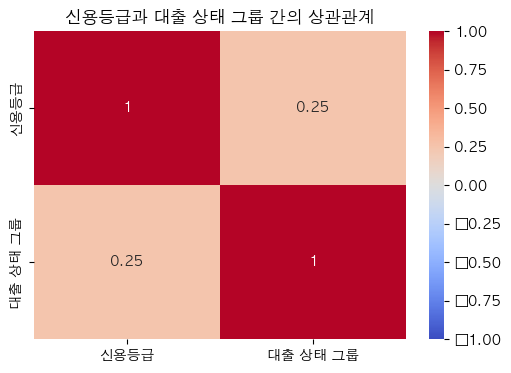

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# '신용등급'을 숫자로 매핑 ('A' = 1, 'B' = 2, ...)
grade_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}

# '신용등급'을 숫자로 변환
data['신용등급'] = data['등급'].map(grade_mapping)

# 'Current' 상태를 제거한 데이터 필터링
filtered_data = data[data['대출 상태'] != 'Current']

# '대출 상태 그룹'을 숫자로 변환 ('양호' = 0, '연체' = 1, 'Default' = 2)
status_numeric_mapping = {'양호': 0, '연체': 1, 'Default': 2}
filtered_data['대출 상태 그룹'] = filtered_data['대출 상태 그룹'].map(status_numeric_mapping)

# 결측값 제거
final_filtered_data = filtered_data[['신용등급', '대출 상태 그룹']].dropna()

# 상관관계 계산
correlation = final_filtered_data.corr()

# 상관관계 출력
print("신용등급과 대출 상태 그룹 간의 상관관계:\n", correlation)

# 상관관계 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('신용등급과 대출 상태 그룹 간의 상관관계')
plt.show()


대출 특성 및 조건 관련 변수 (Loan Characteristics and Terms)
대출 자체의 조건이나 상태와 관련된 변수로, 대출 상환 가능성 평가에 중요합니다.

loan_amnt: 대출 금액. 큰 대출 금액은 대출자의 재정 부담을 증가시킬 수 있음.

funded_amnt: 대출에 실제로 할당된 금액.

installment: 대출자가 매월 상환해야 하는 금액. 높은 월 상환 금액은 재정 부담 증가로 이어질 수 있음.

int_rate: 대출 금리. 금리가 높으면 상환 부담이 커져 부도 가능성 증가.

issue_d: 대출이 실행된 날짜.

loan_status: 현재 대출 상태. 모델의 종속 변수로 사용될 수 있음.

In [21]:
# 대출 신청 금액, 이자율, 대출 기간, 월 상환액 데이터 확인
print(data[['대출 신청 금액', '이자율', '대출 기간', '월 상환액']].head())


   대출 신청 금액     이자율       대출 기간   월 상환액
0    6000.0  0.0797   36 months  187.94
1   35000.0  0.1447   60 months  822.95
2   23200.0  0.2499   60 months  680.82
3    4500.0  0.0993   36 months  145.06
4   15000.0  0.1640   36 months  530.33


In [22]:
import pandas as pd

# '대출 기간' 칼럼에서 'months'를 제거하고 숫자로 변환
data['대출 기간'] = data['대출 기간'].str.replace(' months', '').astype(float)

# 결측치가 있는 행을 제거하기 전에 각 칼럼의 데이터 상태를 다시 확인
print("대출 기간 데이터 타입 및 값:", data['대출 기간'].dtype, data['대출 기간'].unique())
print("이자율 데이터 타입 및 값:", data['이자율'].dtype, data['이자율'].unique())
print("대출 금액 데이터 타입 및 값:", data['대출 금액'].dtype, data['대출 금액'].unique())
print("월 상환액 데이터 타입 및 값:", data['월 상환액'].dtype, data['월 상환액'].unique())

# 결측치가 있는 행을 제거하기 전에, 몇 개의 데이터가 결측치가 있는지 확인
print("대출 기간 결측치 개수:", data['대출 기간'].isnull().sum())
print("이자율 결측치 개수:", data['이자율'].isnull().sum())
print("대출 금액 결측치 개수:", data['대출 금액'].isnull().sum())
print("월 상환액 결측치 개수:", data['월 상환액'].isnull().sum())

# 결측치가 있는 행 제거
data = data.dropna(subset=['대출 기간', '이자율', '대출 금액', '월 상환액'])

# 결측치 제거 후 데이터 상태 확인
if data.empty:
    print("데이터가 없습니다. 데이터를 확인하세요.")
else:
    # 월 상환액을 계산하는 함수
    def calculate_monthly_payment(row):
        loan_amnt = row['대출 금액']
        int_rate = row['이자율']
        term = row['대출 기간']
        
        # 월 이자율 계산 (연 이자율을 12로 나눔)
        monthly_rate = int_rate / 12
        
        # 월 상환액 계산 공식
        if monthly_rate > 0:
            monthly_payment = loan_amnt * (monthly_rate * (1 + monthly_rate) ** term) / ((1 + monthly_rate) ** term - 1)
        else:
            monthly_payment = loan_amnt / term  # 이자율이 0일 경우 단순 나누기
        
        return monthly_payment

    # 각 행에 대해 이론적으로 계산된 월 상환액 계산
    data['계산된 월 상환액'] = data.apply(calculate_monthly_payment, axis=1)

    # 실제 월 상환액과 이론적 월 상환액 간의 차이 계산
    data['차이'] = data['월 상환액'] - data['계산된 월 상환액']

    # 차이를 큰 순서대로 정렬
    sorted_difference = data['차이'].sort_values(ascending=False)

    # 결과 출력 (상위 5개)
    print(data[['대출 금액', '이자율', '대출 기간', '월 상환액', '계산된 월 상환액', '차이']].head())
    print("차이가 큰 상위 5개:\n", sorted_difference.head())


대출 기간 데이터 타입 및 값: float64 [36. 60. nan]
이자율 데이터 타입 및 값: float64 [0.0797 0.1447 0.2499 0.0993 0.164  0.0707 0.1042 0.0999 0.1797 0.0819
 0.1308 0.143  0.1999 0.1033 0.0846 0.1359 0.1799 0.1824 0.1199 0.0881
 0.0735 0.1269 0.1015 0.1367 0.1709 0.1786 0.1399 0.1502 0.1855 0.1825
 0.1504 0.1358 0.0699 0.1524 0.0956 0.1757 0.0756 0.124  0.1171 0.0649
 0.1064 0.1465 0.1299 0.0916 0.2074 0.1081 0.1602 0.0762 0.1612 0.1229
 0.1691 0.0532 0.0992 0.0702 0.1806 0.1402 0.0838 0.0789 0.1139 0.2245
 0.1747 0.1449 0.1149 0.1699 0.158  0.0671 0.2089 0.1614 0.1262 0.3084
 0.0818 0.109  0.0639 0.1727 0.2387 0.0646 0.0697 0.1499 0.0531 0.1131
 0.1899 0.1531 0.2215 0.0902 0.1903 0.0593 0.1919 0.0721 0.1099 0.0724
 0.2631 0.0899 0.1774 0.1105 0.2399 0.2055 0.1153 0.2145 0.1398 0.1561
 0.0975 0.1091 0.1349 0.2185 0.2949 0.0971 0.1408 0.0672 0.1947 0.0839
 0.1601 0.1407 0.1549 0.1102 0.0849 0.1433 0.2411 0.0769 0.1719 0.1155
 0.154  0.2388 0.079  0.1416 0.2437 0.1678 0.1172 0.2149 0.1279 0.2489
 0.089  0.189

/var/folders/r2/nm86hl8s7fv3n393n0wj8s700000gn/T/ipykernel_28834/3382510665.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['계산된 월 상환액'] = data.apply(calculate_monthly_payment, axis=1)
/var/folders/r2/nm86hl8s7fv3n393n0wj8s700000gn/T/ipykernel_28834/3382510665.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['차이'] = data['월 상환액'] - data['계산된 월 상환액']


/Users/damien/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


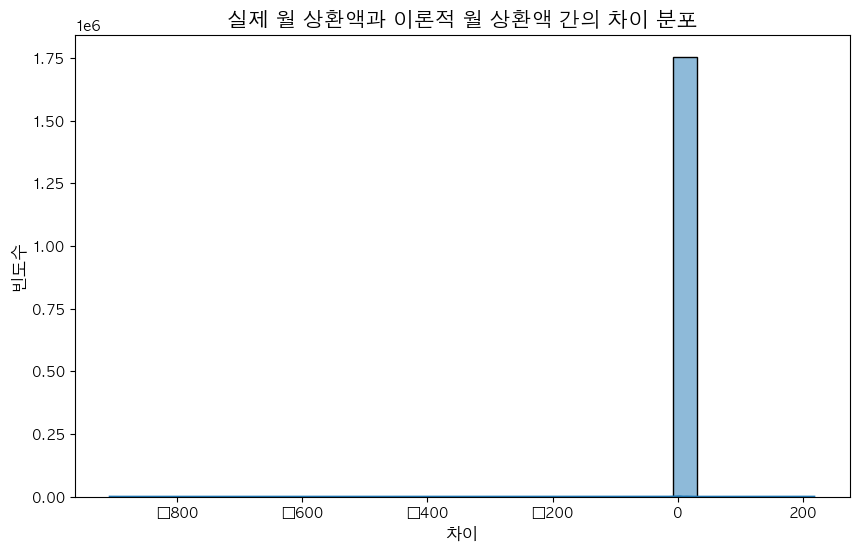

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램과 KDE 그래프 그리기
plt.figure(figsize=(10, 6))

# 히스토그램
sns.histplot(data['차이'], kde=True, bins=30)

# 그래프 제목 및 라벨
plt.title('실제 월 상환액과 이론적 월 상환액 간의 차이 분포', fontsize=15)
plt.xlabel('차이', fontsize=12)
plt.ylabel('빈도수', fontsize=12)

# 그래프 보여주기
plt.show()


In [24]:
# '차이' 열의 통계적 정보 확인
difference_stats = data['차이'].describe()

# 결과 출력
print(difference_stats)


count    1.755294e+06
mean    -3.597873e-03
std      1.702714e+00
min     -9.071711e+02
25%      2.475308e-03
50%      4.991562e-03
75%      7.492969e-03
max      2.177867e+02
Name: 차이, dtype: float64


/var/folders/r2/nm86hl8s7fv3n393n0wj8s700000gn/T/ipykernel_28834/1641526332.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['차이 절대값'] = data['차이'].abs()


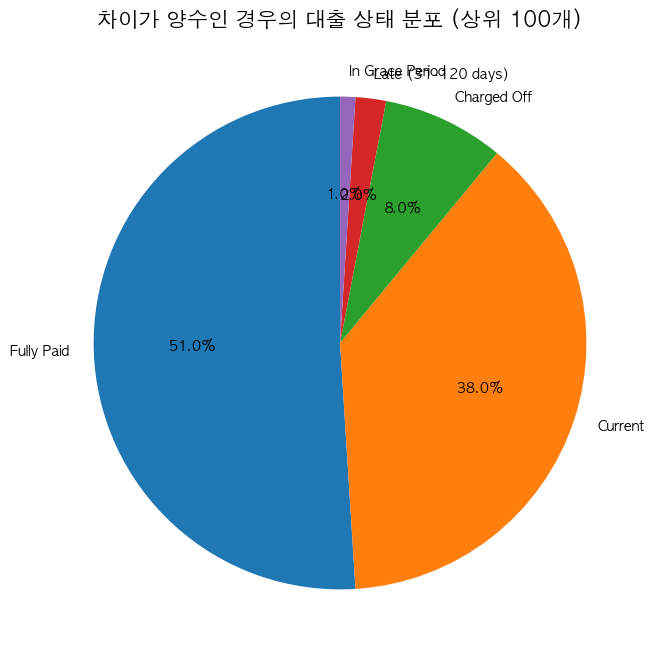

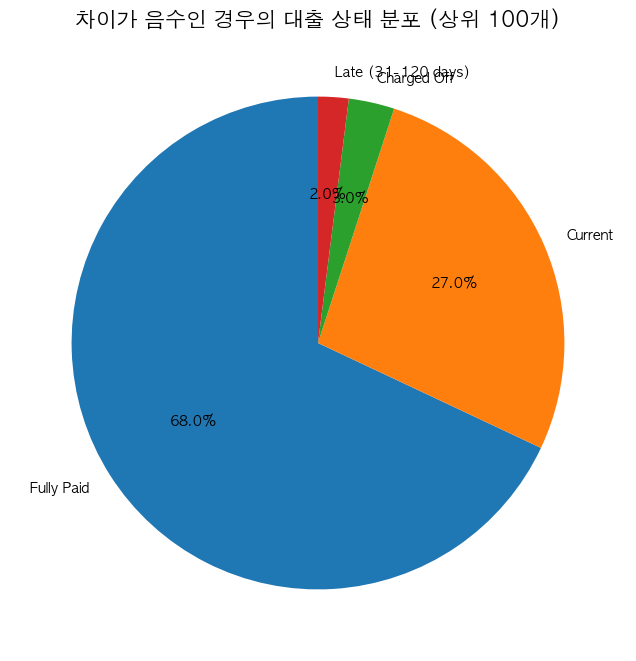

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# '차이'의 절대값 열 추가
data['차이 절대값'] = data['차이'].abs()

# 1. '차이'가 양수인 경우, 절대값이 큰 순서로 정렬 (상위 100개로 확장)
positive_diff_large = data[data['차이'] > 0].sort_values(by='차이 절대값', ascending=False).head(100)

# 2. '차이'가 음수인 경우, 절대값이 큰 순서로 정렬 (상위 100개로 확장)
negative_diff_large = data[data['차이'] < 0].sort_values(by='차이 절대값', ascending=False).head(100)

# 3. '차이'가 양수인 경우의 loan_status 분포
positive_loan_status_large = positive_diff_large['대출 상태'].value_counts()

# 4. '차이'가 음수인 경우의 loan_status 분포
negative_loan_status_large = negative_diff_large['대출 상태'].value_counts()

# 5. 원형 그래프로 시각화 (양수인 경우)
plt.figure(figsize=(8, 8))
plt.pie(positive_loan_status_large, labels=positive_loan_status_large.index, autopct='%1.1f%%', startangle=90)
plt.title('차이가 양수인 경우의 대출 상태 분포 (상위 100개)', fontsize=15)
plt.show()

# 6. 원형 그래프로 시각화 (음수인 경우)
plt.figure(figsize=(8, 8))
plt.pie(negative_loan_status_large, labels=negative_loan_status_large.index, autopct='%1.1f%%', startangle=90)
plt.title('차이가 음수인 경우의 대출 상태 분포 (상위 100개)', fontsize=15)
plt.show()


In [26]:
import pandas as pd

# 모기지 계좌 수 열 확인
mortgage_df = data[['모기지 계좌 수']]  # '모기지 계좌 수'만 추출

# 모기지 계좌 수에 대한 기본적인 통계 정보
mortgage_stats = mortgage_df['모기지 계좌 수'].describe()

# 모기지 계좌 수의 분포 확인
mortgage_dist = mortgage_df['모기지 계좌 수'].value_counts().sort_index()

# 결과 출력
print("모기지 계좌 수에 대한 통계 정보:\n", mortgage_stats)
print("\n모기지 계좌 수 분포:\n", mortgage_dist)


모기지 계좌 수에 대한 통계 정보:
 count    1.725310e+06
mean     1.511964e+00
std      1.870586e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.400000e+01
Name: 모기지 계좌 수, dtype: float64

모기지 계좌 수 분포:
 모기지 계좌 수
0.0     740062
1.0     304923
2.0     256230
3.0     178556
4.0     113294
5.0      64142
6.0      34123
7.0      16930
8.0       8203
9.0       4037
10.0      2105
11.0      1094
12.0       567
13.0       332
14.0       240
15.0       125
16.0        96
17.0        63
18.0        42
19.0        26
20.0        20
21.0        14
22.0        13
23.0        14
24.0        13
25.0         9
26.0         1
27.0         5
28.0         4
29.0         3
30.0         3
31.0         3
32.0         3
33.0         2
34.0         1
35.0         2
36.0         1
37.0         2
41.0         1
45.0         1
46.0         1
47.0         1
51.0         1
87.0         1
94.0         1
Name: count, dtype: int64


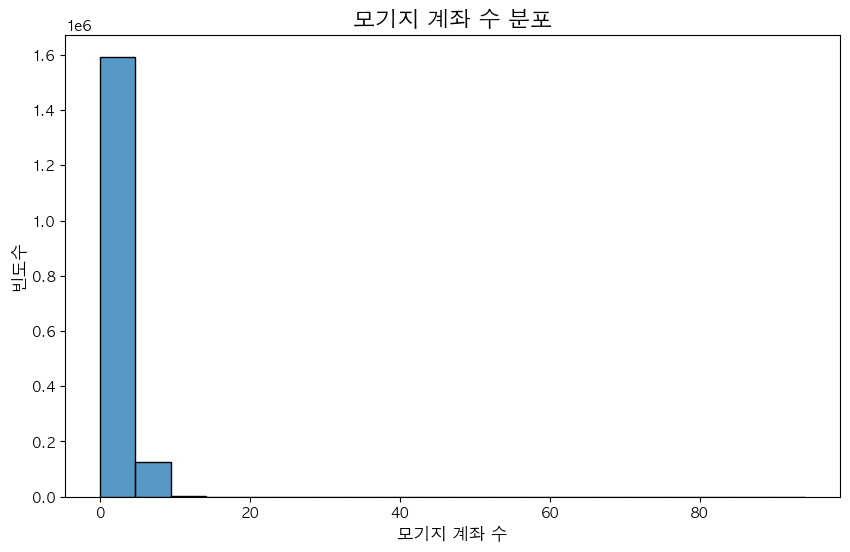

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모기지 계좌 수 분포 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(data['모기지 계좌 수'], bins=20, kde=False)

# 그래프 제목 및 라벨 설정
plt.title('모기지 계좌 수 분포', fontsize=16)
plt.xlabel('모기지 계좌 수', fontsize=12)
plt.ylabel('빈도수', fontsize=12)

# 그래프 보여주기
plt.show()


/var/folders/r2/nm86hl8s7fv3n393n0wj8s700000gn/T/ipykernel_28834/1135751372.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['대출 상태 그룹'] = data['대출 상태'].map(status_mapping)


모기지 계좌 수와 대출 상태 간의 상관관계 (양호 vs Default):
           모기지 계좌 수  대출 상태 그룹
모기지 계좌 수  1.000000 -0.074586
대출 상태 그룹 -0.074586  1.000000


/var/folders/r2/nm86hl8s7fv3n393n0wj8s700000gn/T/ipykernel_28834/1135751372.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['대출 상태 그룹'] = filtered_data['대출 상태 그룹'].map(status_numeric_mapping)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.draw()
/Users/damien/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


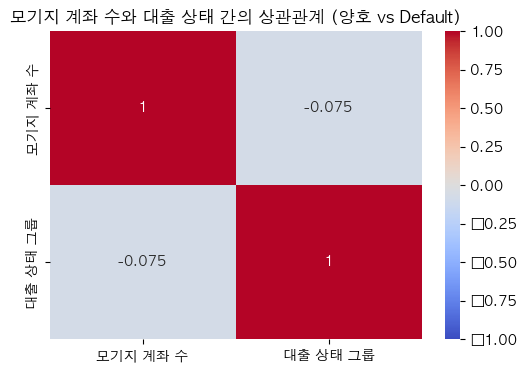

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# '대출 상태'를 '양호'와 'Default'로 매핑
status_mapping = {
    'Fully Paid': '양호',
    'Charged Off': 'Default'
}

# '대출 상태'를 기준으로 '대출 상태 그룹'에 값을 매핑
data['대출 상태 그룹'] = data['대출 상태'].map(status_mapping)

# 'Current', 'Late', 'In Grace Period' 상태를 제거한 데이터 필터링
filtered_data = data[data['대출 상태 그룹'].notnull()]

# 부도 상태를 숫자로 매핑 ('양호' = 0, 'Default' = 1)
status_numeric_mapping = {'양호': 0, 'Default': 1}
filtered_data['대출 상태 그룹'] = filtered_data['대출 상태 그룹'].map(status_numeric_mapping)

# 모기지 계좌 수와 대출 상태 그룹만을 남겨서 결측값 제거
final_filtered_data = filtered_data[['모기지 계좌 수', '대출 상태 그룹']].dropna()

# 상관관계 계산
correlation = final_filtered_data.corr()

# 상관관계 출력
print("모기지 계좌 수와 대출 상태 간의 상관관계 (양호 vs Default):\n", correlation)

# 상관관계 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('모기지 계좌 수와 대출 상태 간의 상관관계 (양호 vs Default)')
plt.show()


In [29]:
# 데이터프레임의 열 이름을 한 줄씩 출력
for col in data.columns:
    print(col)


고유 ID
대출 신청 금액
대출 금액
투자자별 대출 금액
대출 기간
이자율
월 상환액
등급
하위 등급
직업명
근무 기간 (년)
주택 소유 상태
연간 소득
소득 검증 상태
발행일
대출 상태
상환 계획 여부
url
대출 목적
대출 제목
우편번호
주소 상태
부채 대비 소득 비율
지난 2년간 30일 이상 연체된 계좌 수
최초 신용 계좌 개설일
FICO 하한선
FICO 상한선
지난 6개월간 조회 수
최근 연체 후 경과 개월 수
최근 기록 후 경과 개월 수
현재 활성 신용 계좌 수
공공 기록 수
회전 신용 잔액
회전 계좌 사용 비율
총 계좌 수
초기 상장 상태
잔여 원금
투자자별 잔여 원금
총 지급 금액
투자자별 총 지급 금액
지급된 원금 총액
지급된 이자 총액
지급된 연체 수수료 총액
차감 후 회수 금액
차감 후 회수 수수료
최근 지급일
최근 지급된 금액
다음 예정 상환일
최근 신용 조회일
최근 FICO 상한선
최근 FICO 하한선
지난 12개월간 (의료 제외) 추심 횟수
최근 90일 이상 연체 후 경과 개월 수
정책 코드
신청 유형
연간 공동 소득
공동 신청인의 부채 대비 소득 비율
verification_status_joint
현재 연체 계좌 수
총 추심 금액
총 현재 잔액
지난 6개월간 활성 신용 계좌 수
활성 할부 계좌 수
지난 12개월간 할부 계좌 개설 수
지난 24개월간 할부 계좌 개설 수
최근 할부 계좌 개설 후 개월 수
할부 계좌 총 잔액
할부 계좌 한도 대비 사용 비율
지난 12개월간 회전 계좌 개설 수
지난 24개월간 회전 계좌 개설 수
최대 은행카드 잔액
모든 거래의 잔액 대비 한도 비율
회전 신용 고한도 총액
금융 조회 수
금융 거래 계좌 수
지난 12개월간 조회 수
최근 24개월간 개설된 계좌 수
평균 현재 잔액
은행카드 사용 가능 금액
은행카드 한도 대비 사용 비율
지난 12개월간 차감 횟수
현재 연체된 계좌의 연체 금액
가장 오래된 할부 계좌 개설 후 월 수
가장 오래된 회전 계좌 개설 후 월 수
최근 회전 계좌 개설 후 월 수
최근 계좌 개

/var/folders/r2/nm86hl8s7fv3n393n0wj8s700000gn/T/ipykernel_28834/3963622581.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['대출 상태 그룹'] = data['대출 상태'].map(status_mapping)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.draw()
/Users/damien/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


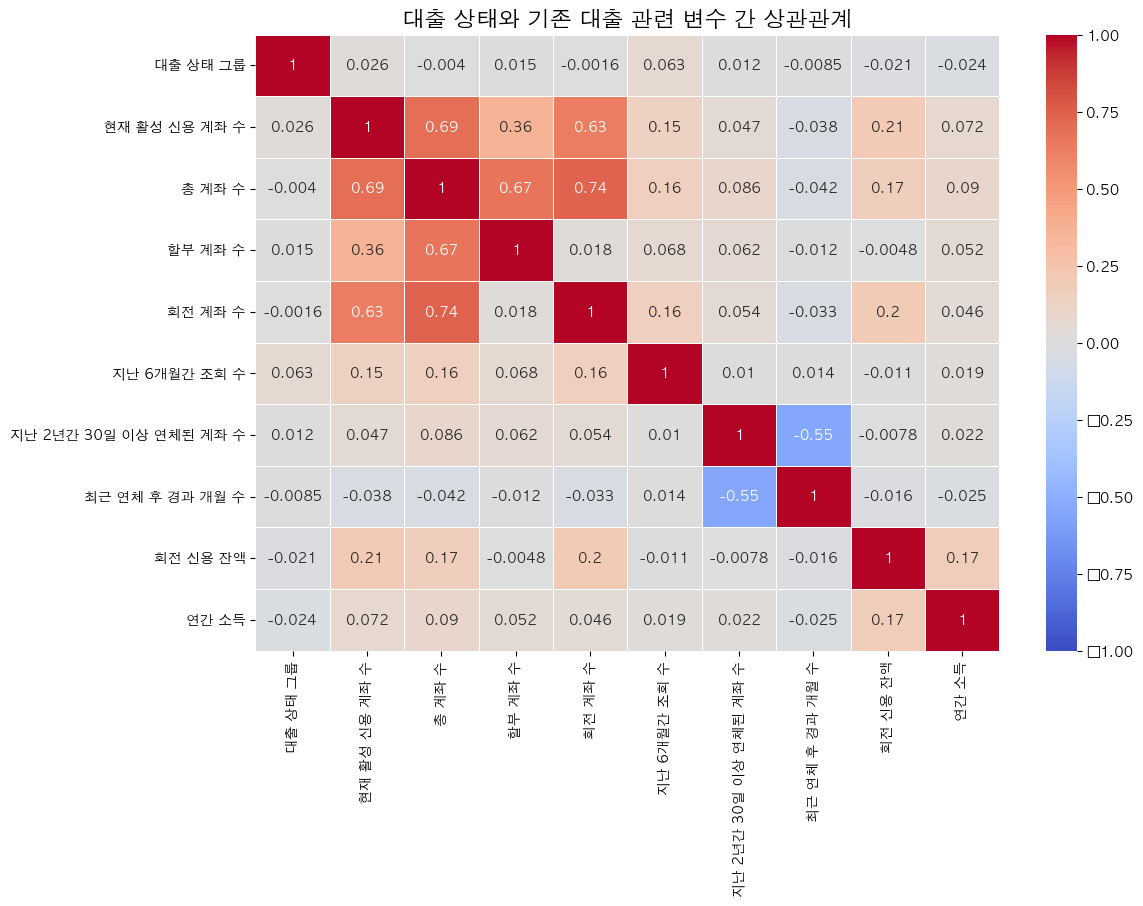

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 대출 상태를 '양호'와 'Default'로 매핑
status_mapping = {
    'Fully Paid': 0,  # 양호
    'Charged Off': 1  # Default
}

# '대출 상태'를 기준으로 '대출 상태 그룹'에 값을 매핑
data['대출 상태 그룹'] = data['대출 상태'].map(status_mapping)

# 상관관계 분석에 사용할 변수 목록 (모기지 계좌 수 제외)
variables_of_interest = [
    '현재 활성 신용 계좌 수', '총 계좌 수', '할부 계좌 수',
    '회전 계좌 수', '지난 6개월간 조회 수', '지난 2년간 30일 이상 연체된 계좌 수',
    '최근 연체 후 경과 개월 수', '회전 신용 잔액', '연간 소득'
]

# 분석할 데이터 필터링 (결측치 제거)
filtered_data = data[['대출 상태 그룹'] + variables_of_interest].dropna()

# 상관관계 계산
correlation_matrix = filtered_data.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('대출 상태와 기존 대출 관련 변수 간 상관관계', fontsize=16)
plt.show()


In [31]:
# 대출 이후의 변수로 보이는 컬럼들 목록 (필요 시 추가/수정)
post_loan_columns = [
    '대출 상태', '상환 계획 여부', '최근 지급일', '최근 지급된 금액', '총 지급 금액',
    '투자자별 총 지급 금액', '지급된 원금 총액', '지급된 이자 총액', '지급된 연체 수수료 총액',
    '차감 후 회수 금액', '차감 후 회수 수수료', '잔여 원금', '투자자별 잔여 원금'
    # 필요 시 추가 가능
]

# 대출 이후 변수를 제외한 독립변수 데이터프레임 생성
X_all_features = data.drop(columns=post_loan_columns + ['대출 상태 그룹'], errors='ignore')

# 데이터프레임의 차원 확인
print(f"대출 이후 변수 제거 후 데이터프레임 차원: {X_all_features.shape}")


대출 이후 변수 제거 후 데이터프레임 차원: (1755294, 133)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.draw()
/Users/damien/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


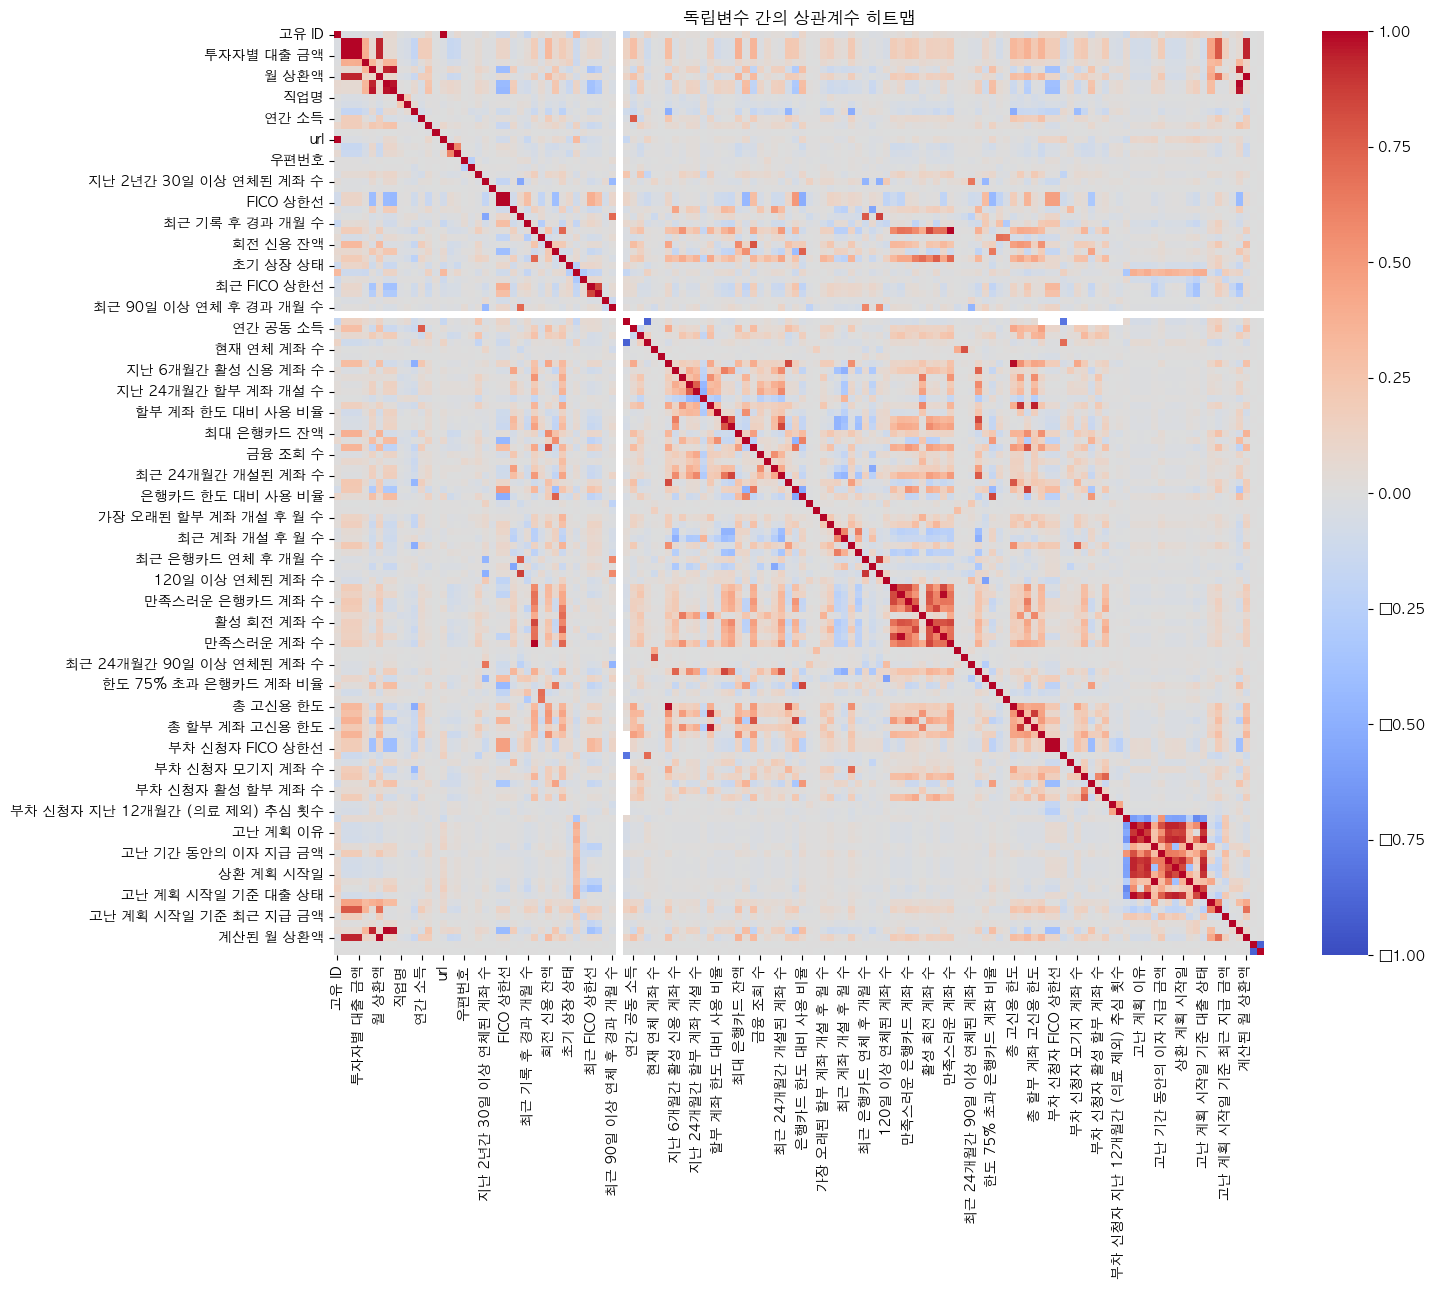

In [33]:
from sklearn.preprocessing import LabelEncoder

# '이자율 구간' 컬럼 삭제 (필요한 모든 범주형 변수를 삭제하세요)
X_all_features = X_all_features.drop(columns=['이자율 구간'], errors='ignore')

# 범주형 변수를 숫자형으로 인코딩
label_encoders = {}
for column in X_all_features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_all_features[column] = le.fit_transform(X_all_features[column].astype(str))
    label_encoders[column] = le

# 모든 독립변수에 대한 상관관계 계산
correlation_matrix = X_all_features.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('독립변수 간의 상관계수 히트맵')
plt.show()


In [34]:
# 결측치 비율이 30% 이상인 컬럼 찾기
missing_ratio = X_all_features.isnull().mean()  # 각 컬럼의 결측치 비율 계산
columns_above_30_percent = missing_ratio[missing_ratio > 0.30].index.tolist()  # 결측치 비율이 30% 이상인 컬럼의 이름 리스트

# 결과 출력
print(f"결측치가 30% 이상인 컬럼 목록: {columns_above_30_percent}")
print(f"해당 컬럼들의 결측치 비율:\n{missing_ratio[columns_above_30_percent]}")


결측치가 30% 이상인 컬럼 목록: ['최근 연체 후 경과 개월 수', '최근 기록 후 경과 개월 수', '최근 90일 이상 연체 후 경과 개월 수', '연간 공동 소득', '공동 신청인의 부채 대비 소득 비율', '최근 할부 계좌 개설 후 개월 수', '할부 계좌 한도 대비 사용 비율', '최근 은행카드 연체 후 개월 수', '최근 회전 계좌 연체 후 개월 수', '공동 대출자의 회전 신용 잔액', '부차 신청자 FICO 하한선', '부차 신청자 FICO 상한선', '부차 신청자 최근 6개월간 조회 수', '부차 신청자 모기지 계좌 수', '부차 신청자 활성 계좌 수', '부차 신청자 회전 신용 한도 대비 사용 비율', '부차 신청자 활성 할부 계좌 수', '부차 신청자 회전 계좌 수', '부차 신청자 지난 12개월간 차감 횟수', '부차 신청자 지난 12개월간 (의료 제외) 추심 횟수', '고난 기간', '고난 기간 동안의 이자 지급 금액', '고난 계획 기간', '고난 계획 시작일 기준 연체 일수', '고난 계획 시작일 기준 예상 추가 이자', '고난 계획 시작일 기준 상환 잔액', '고난 계획 시작일 기준 최근 지급 금액']
해당 컬럼들의 결측치 비율:
최근 연체 후 경과 개월 수                  0.525381
최근 기록 후 경과 개월 수                  0.853820
최근 90일 이상 연체 후 경과 개월 수           0.753080
연간 공동 소득                         0.928014
공동 신청인의 부채 대비 소득 비율              0.928015
최근 할부 계좌 개설 후 개월 수               0.316756
할부 계좌 한도 대비 사용 비율                0.395648
최근 은행카드 연체 후 개월 수                0.777982
최근 회전 계좌 연체 후 개월 수               0.682074
공동 대출자의 회전 신용 잔액    

In [35]:
# 결측치가 30% 이상인 컬럼을 제거
X_cleaned = X_all_features.drop(columns=columns_above_30_percent)

# 나머지 컬럼 목록 확인
remaining_columns = X_cleaned.columns.tolist()

# 결과 출력
print(f"남은 컬럼 목록: {remaining_columns}")
print(f"남은 컬럼 수: {len(remaining_columns)}")


남은 컬럼 목록: ['고유 ID', '대출 신청 금액', '대출 금액', '투자자별 대출 금액', '대출 기간', '이자율', '월 상환액', '등급', '하위 등급', '직업명', '근무 기간 (년)', '주택 소유 상태', '연간 소득', '소득 검증 상태', '발행일', 'url', '대출 목적', '대출 제목', '우편번호', '주소 상태', '부채 대비 소득 비율', '지난 2년간 30일 이상 연체된 계좌 수', '최초 신용 계좌 개설일', 'FICO 하한선', 'FICO 상한선', '지난 6개월간 조회 수', '현재 활성 신용 계좌 수', '공공 기록 수', '회전 신용 잔액', '회전 계좌 사용 비율', '총 계좌 수', '초기 상장 상태', '다음 예정 상환일', '최근 신용 조회일', '최근 FICO 상한선', '최근 FICO 하한선', '지난 12개월간 (의료 제외) 추심 횟수', '정책 코드', '신청 유형', 'verification_status_joint', '현재 연체 계좌 수', '총 추심 금액', '총 현재 잔액', '지난 6개월간 활성 신용 계좌 수', '활성 할부 계좌 수', '지난 12개월간 할부 계좌 개설 수', '지난 24개월간 할부 계좌 개설 수', '할부 계좌 총 잔액', '지난 12개월간 회전 계좌 개설 수', '지난 24개월간 회전 계좌 개설 수', '최대 은행카드 잔액', '모든 거래의 잔액 대비 한도 비율', '회전 신용 고한도 총액', '금융 조회 수', '금융 거래 계좌 수', '지난 12개월간 조회 수', '최근 24개월간 개설된 계좌 수', '평균 현재 잔액', '은행카드 사용 가능 금액', '은행카드 한도 대비 사용 비율', '지난 12개월간 차감 횟수', '현재 연체된 계좌의 연체 금액', '가장 오래된 할부 계좌 개설 후 월 수', '가장 오래된 회전 계좌 개설 후 월 수', '최근 회전 계좌 개설 후 월 수', '최근 계좌 개설 후 월 수', '모기지 계좌 수', '최근 은행카드 계좌 개설 후 개월

In [36]:
# 대출 이후의 데이터로 보이는 변수들을 지정
post_loan_columns = [
    '다음 예정 상환일', '최근 신용 조회일', '최근 지급일', '잔여 원금', '차감 후 회수 금액', '차감 후 회수 수수료', 
    '총 지급 금액', '최근 FICO 상한선', '최근 FICO 하한선', '고난 계획 여부', '고난 계획 유형', '고난 계획 이유',
    '고난 계획 상태', '고난 계획 시작일', '고난 계획 종료일', '고난 계획 시작일 기준 연체 일수', '고난 계획 시작일 기준 대출 상태',
    '상환 계획 시작일', '차감 후 회수 수수료', '최근 지급된 금액', '계산된 월 상환액', '차이', '차이 절대값', '채무 조정 여부'
]

# 지정한 대출 이후의 컬럼들을 제거
X_final = X_cleaned.drop(columns=post_loan_columns, errors='ignore')

# 남은 컬럼 목록 확인
remaining_columns_final = X_final.columns.tolist()

# 결과 출력
print(f"대출 이후 변수 제거 후 남은 컬럼 목록: {remaining_columns_final}")
print(f"남은 컬럼 수: {len(remaining_columns_final)}")


대출 이후 변수 제거 후 남은 컬럼 목록: ['고유 ID', '대출 신청 금액', '대출 금액', '투자자별 대출 금액', '대출 기간', '이자율', '월 상환액', '등급', '하위 등급', '직업명', '근무 기간 (년)', '주택 소유 상태', '연간 소득', '소득 검증 상태', '발행일', 'url', '대출 목적', '대출 제목', '우편번호', '주소 상태', '부채 대비 소득 비율', '지난 2년간 30일 이상 연체된 계좌 수', '최초 신용 계좌 개설일', 'FICO 하한선', 'FICO 상한선', '지난 6개월간 조회 수', '현재 활성 신용 계좌 수', '공공 기록 수', '회전 신용 잔액', '회전 계좌 사용 비율', '총 계좌 수', '초기 상장 상태', '지난 12개월간 (의료 제외) 추심 횟수', '정책 코드', '신청 유형', 'verification_status_joint', '현재 연체 계좌 수', '총 추심 금액', '총 현재 잔액', '지난 6개월간 활성 신용 계좌 수', '활성 할부 계좌 수', '지난 12개월간 할부 계좌 개설 수', '지난 24개월간 할부 계좌 개설 수', '할부 계좌 총 잔액', '지난 12개월간 회전 계좌 개설 수', '지난 24개월간 회전 계좌 개설 수', '최대 은행카드 잔액', '모든 거래의 잔액 대비 한도 비율', '회전 신용 고한도 총액', '금융 조회 수', '금융 거래 계좌 수', '지난 12개월간 조회 수', '최근 24개월간 개설된 계좌 수', '평균 현재 잔액', '은행카드 사용 가능 금액', '은행카드 한도 대비 사용 비율', '지난 12개월간 차감 횟수', '현재 연체된 계좌의 연체 금액', '가장 오래된 할부 계좌 개설 후 월 수', '가장 오래된 회전 계좌 개설 후 월 수', '최근 회전 계좌 개설 후 월 수', '최근 계좌 개설 후 월 수', '모기지 계좌 수', '최근 은행카드 계좌 개설 후 개월 수', '최근 조회 후 개월 수', '120일 이상 연체된 계좌 수', '

## 왜 최근 FICO 상한선을? 중요해보이는데?
### 최근이라... 아무래도 좀 많이 반영될 듯.

In [37]:
# '대출 상태 그룹'을 양호와 Default만 포함하도록 필터링
filtered_data = data[data['대출 상태 그룹'].isin([0, 2])]  # '0'은 양호, '2'는 Default를 의미함

# 결과 확인
print(filtered_data['대출 상태 그룹'].value_counts())


대출 상태 그룹
0.0    898522
Name: count, dtype: int64


In [45]:
# 남은 컬럼 목록 확인
remaining_columns_final = X_final.columns.tolist()

# 결과 출력
print(f"대출 이후 변수 제거 후 남은 컬럼 목록: {remaining_columns_final}")
print(f"남은 컬럼 수: {len(remaining_columns_final)}")


대출 이후 변수 제거 후 남은 컬럼 목록: ['고유 ID', '대출 신청 금액', '대출 금액', '투자자별 대출 금액', '대출 기간', '이자율', '월 상환액', '등급', '하위 등급', '직업명', '근무 기간 (년)', '주택 소유 상태', '연간 소득', '소득 검증 상태', '발행일', 'url', '대출 목적', '대출 제목', '우편번호', '주소 상태', '부채 대비 소득 비율', '지난 2년간 30일 이상 연체된 계좌 수', '최초 신용 계좌 개설일', 'FICO 하한선', 'FICO 상한선', '지난 6개월간 조회 수', '현재 활성 신용 계좌 수', '공공 기록 수', '회전 신용 잔액', '회전 계좌 사용 비율', '총 계좌 수', '초기 상장 상태', '지난 12개월간 (의료 제외) 추심 횟수', '정책 코드', '신청 유형', 'verification_status_joint', '현재 연체 계좌 수', '총 추심 금액', '총 현재 잔액', '지난 6개월간 활성 신용 계좌 수', '활성 할부 계좌 수', '지난 12개월간 할부 계좌 개설 수', '지난 24개월간 할부 계좌 개설 수', '할부 계좌 총 잔액', '지난 12개월간 회전 계좌 개설 수', '지난 24개월간 회전 계좌 개설 수', '최대 은행카드 잔액', '모든 거래의 잔액 대비 한도 비율', '회전 신용 고한도 총액', '금융 조회 수', '금융 거래 계좌 수', '지난 12개월간 조회 수', '최근 24개월간 개설된 계좌 수', '평균 현재 잔액', '은행카드 사용 가능 금액', '은행카드 한도 대비 사용 비율', '지난 12개월간 차감 횟수', '현재 연체된 계좌의 연체 금액', '가장 오래된 할부 계좌 개설 후 월 수', '가장 오래된 회전 계좌 개설 후 월 수', '최근 회전 계좌 개설 후 월 수', '최근 계좌 개설 후 월 수', '모기지 계좌 수', '최근 은행카드 계좌 개설 후 개월 수', '최근 조회 후 개월 수', '120일 이상 연체된 계좌 수', '

In [46]:
import pandas as pd
import numpy as np

# 종속변수 준비
y = filtered_data['대출 상태 그룹']  # 종속변수

# 독립변수와 종속변수를 합친 데이터프레임 생성
data_for_correlation = pd.concat([X_final, y], axis=1)

# 상관관계 계산 (pairwise 방식으로 결측치 처리)
correlations = data_for_correlation.corr(min_periods=30)['대출 상태 그룹'].drop('대출 상태 그룹')

# 상관계수 절대값 기준으로 정렬
correlations_abs = correlations.abs().sort_values(ascending=False)

# 결과 출력
print("독립변수와 종속변수 간의 상관계수:\n", correlations_abs)


독립변수와 종속변수 간의 상관계수:
 고유 ID                       NaN
대출 신청 금액                    NaN
대출 금액                       NaN
투자자별 대출 금액                  NaN
대출 기간                       NaN
이자율                         NaN
월 상환액                       NaN
등급                          NaN
하위 등급                       NaN
직업명                         NaN
근무 기간 (년)                   NaN
주택 소유 상태                    NaN
연간 소득                       NaN
소득 검증 상태                    NaN
발행일                         NaN
url                         NaN
대출 목적                       NaN
대출 제목                       NaN
우편번호                        NaN
주소 상태                       NaN
부채 대비 소득 비율                 NaN
지난 2년간 30일 이상 연체된 계좌 수      NaN
최초 신용 계좌 개설일                NaN
FICO 하한선                    NaN
FICO 상한선                    NaN
지난 6개월간 조회 수                NaN
현재 활성 신용 계좌 수               NaN
공공 기록 수                     NaN
회전 신용 잔액                    NaN
회전 계좌 사용 비율                 NaN
총 계좌 수             

In [47]:
# 데이터 타입 확인
print("독립변수 데이터 타입:\n", X_final.dtypes)
print("\n종속변수 데이터 타입:\n", y.dtypes)


독립변수 데이터 타입:
 고유 ID                          int64
대출 신청 금액                     float64
대출 금액                        float64
투자자별 대출 금액                   float64
대출 기간                        float64
이자율                          float64
월 상환액                        float64
등급                             int64
하위 등급                          int64
직업명                            int64
근무 기간 (년)                      int64
주택 소유 상태                       int64
연간 소득                        float64
소득 검증 상태                       int64
발행일                            int64
url                            int64
대출 목적                          int64
대출 제목                          int64
우편번호                           int64
주소 상태                          int64
부채 대비 소득 비율                  float64
지난 2년간 30일 이상 연체된 계좌 수       float64
최초 신용 계좌 개설일                   int64
FICO 하한선                     float64
FICO 상한선                     float64
지난 6개월간 조회 수                 float64
현재 활성 신용 계좌 수           